In [1]:
import os

import pandas as pd
import numpy as np

import sys
sys.path.append("..")

from plot import plot_segment_grid

print(os.getcwd())

c:\Users\erich\Desktop\HYU\신용카드 고객 세그먼트 분류 공모전\eda\1.회원정보


In [2]:
customers = []

months = [7, 8, 9, 10, 11, 12]

for month in months:
    # train = pd.read_parquet(f"../data/train/1.회원정보/2018{month:02}_train_회원정보.parquet")
    # test = pd.read_parquet(f"../data/test/1.회원정보/2018{month:02}_test_회원정보.parquet")
    # customers.append(pd.concat([train, test], ignore_index=True))

    customers.append(pd.read_parquet(f"../../data/train/1.회원정보/2018{month:02}_train_회원정보.parquet"))

In [3]:
customers[0].columns

Index(['기준년월', 'ID', '남녀구분코드', '연령', 'Segment', '회원여부_이용가능', '회원여부_이용가능_CA',
       '회원여부_이용가능_카드론', '소지여부_신용', '소지카드수_유효_신용', '소지카드수_이용가능_신용', '입회일자_신용',
       '입회경과개월수_신용', '회원여부_연체', '이용거절여부_카드론', '동의여부_한도증액안내', '수신거부여부_TM',
       '수신거부여부_DM', '수신거부여부_메일', '수신거부여부_SMS', '가입통신회사코드', '탈회횟수_누적',
       '최종탈회후경과월', '탈회횟수_발급6개월이내', '탈회횟수_발급1년이내', '거주시도명', '직장시도명', '마케팅동의여부',
       '유효카드수_신용체크', '유효카드수_신용', '유효카드수_신용_가족', '유효카드수_체크', '유효카드수_체크_가족',
       '이용가능카드수_신용체크', '이용가능카드수_신용', '이용가능카드수_신용_가족', '이용가능카드수_체크',
       '이용가능카드수_체크_가족', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크',
       '이용카드수_체크_가족', '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족',
       '이용금액_R3M_체크', '이용금액_R3M_체크_가족', '_1순위카드이용금액', '_1순위카드이용건수',
       '_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분',
       '최종유효년월_신용_이용가능', '최종유효년월_신용_이용', '최종카드발급일자', '보유여부_해외겸용_본인',
       '이용가능여부_해외겸용_본인', '이용여부_3M_해외겸용_본인', '보유여부_해외겸용_신용_본인',
       '이용가능여부_해외겸용_신용_본인', '이용여부_3M_해외겸용_신용_본인', '연회비발생카드수_B0M',
 

### 사전 요약

- `이용금액_R3M_신용`, `이용금액_R3M_신용_가족`이 Segment를 나누는데 좀 도움이 될 것 같음.
- 그에 반해, `체크` 관련 변수들은 크게 의미가 없을 것 같음.

Segment 별로 분포의 차이가 있을 것 같음.

Boxplot을 보면, A, B가 그나마 제일 비슷하고, C, D, E는 각 차이가 있음.

-> 만약 kernel density estimation으로 분포 추정하고나서, 각 분포가 서로 통계적으로 차이가 있는지 확인하면 이것도 역시 파생변수로 하나 뽑을 수 있을 듯?
---
- `연회비발생카드수_BOM`는 Segment 별로 의미가 없을 듯
- `연회비할인카드수_B0M`도 마찬가지
- `기본연회비_B0M`도 마찬가지. 0이 엄청 많음
- `제휴연회비_B0M`도 마찬가지.
- `할인금액_기본연회비_B0M`도 마찬가지
- `할인금액_제휴연회비_B0M`도 마찬가지
- `청구금액_기본연회비_B0M`도 마찬가지
- `청구금액_제휴연회비_B0M`도 마찬가지
연회비는 쓸 만한 변수가 아에 없음.

## 이용금액_R3M

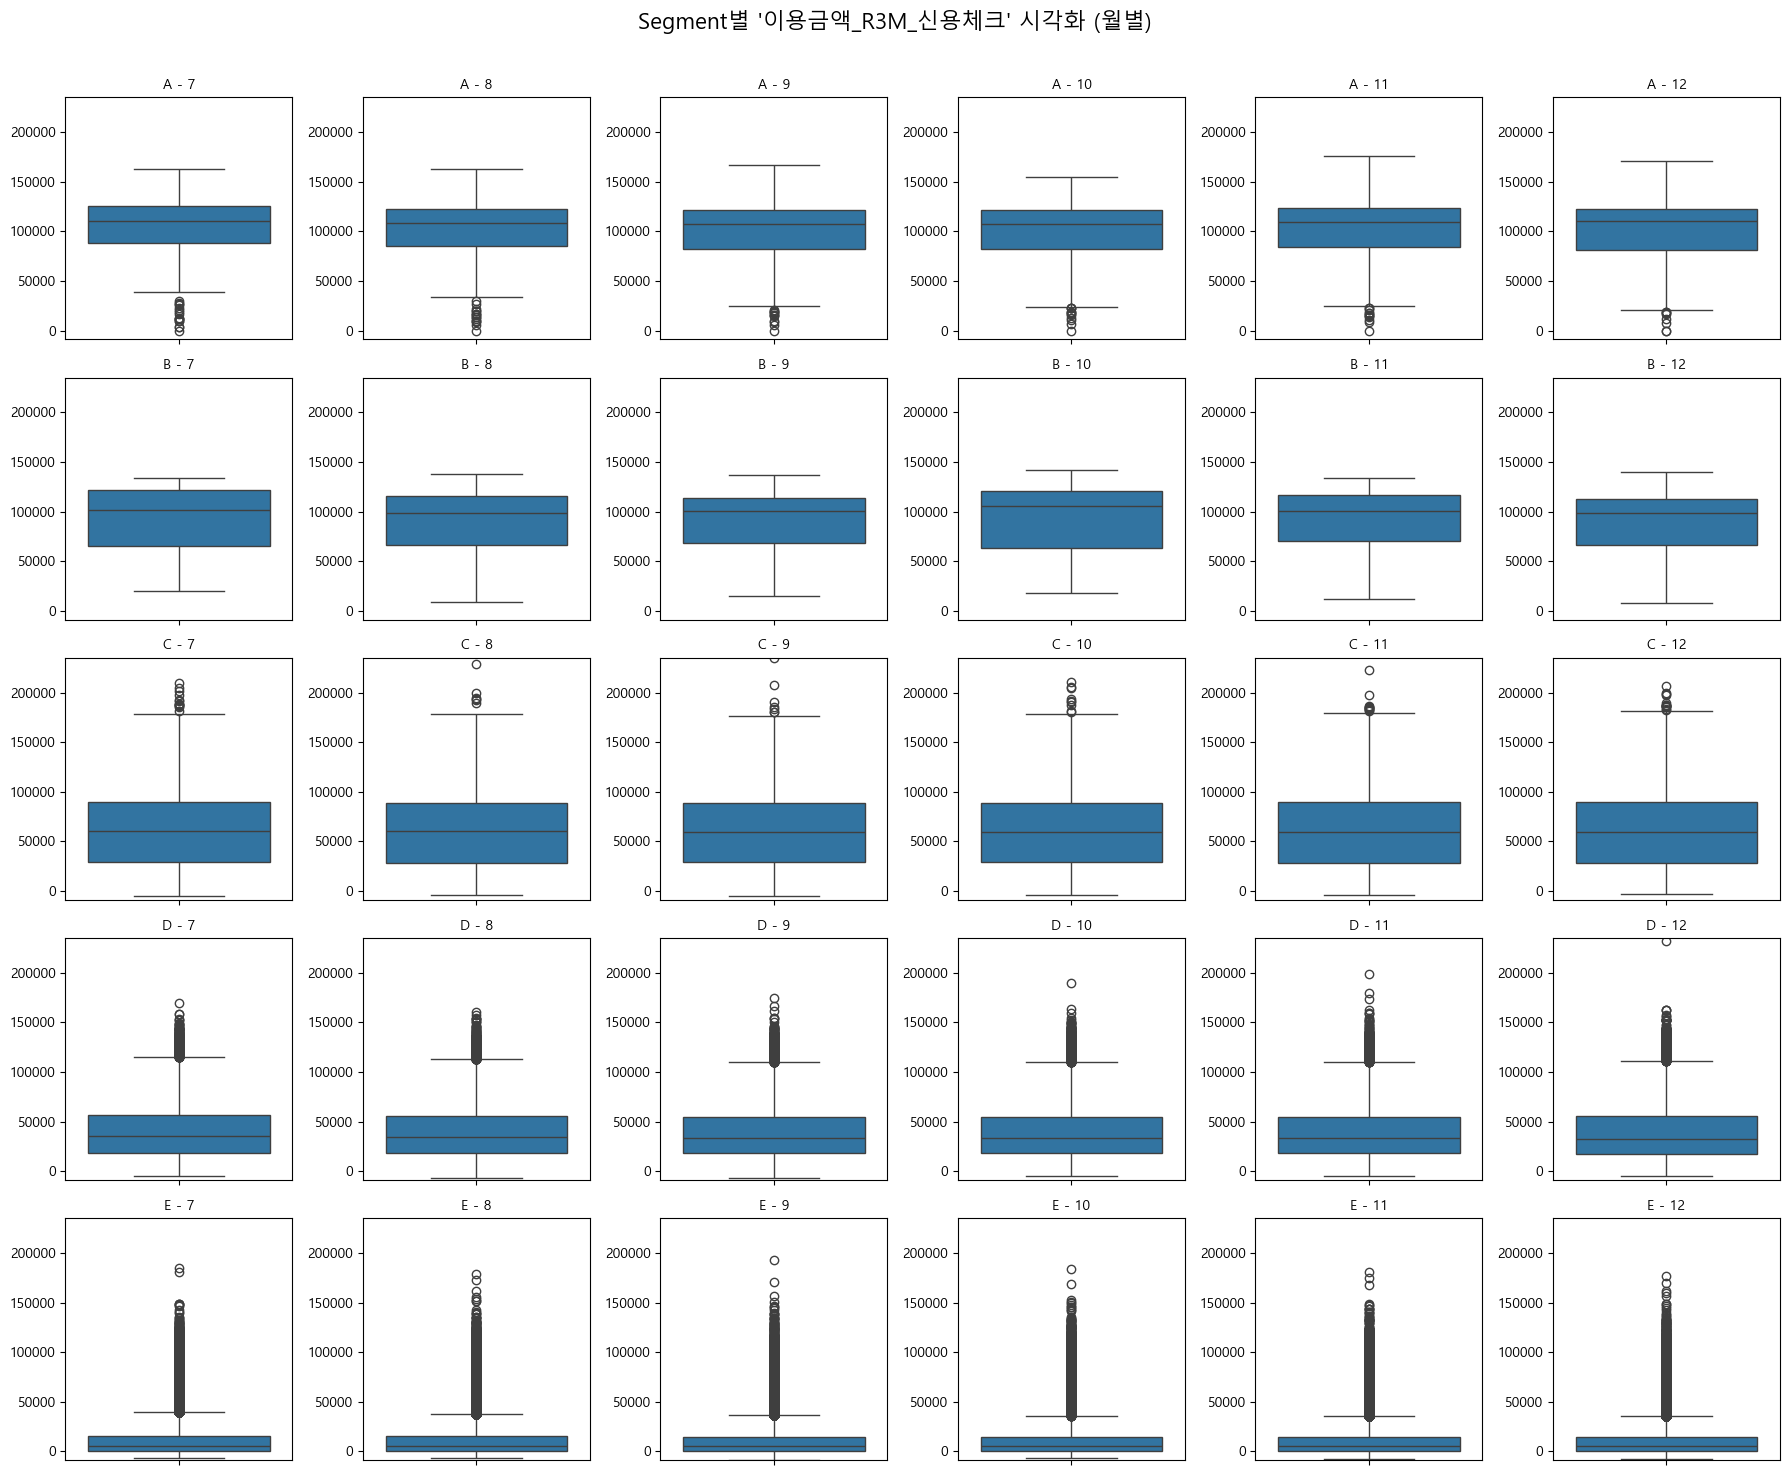

In [5]:
plot_segment_grid(dfs = customers,
                  col = "이용금액_R3M_신용체크",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3))

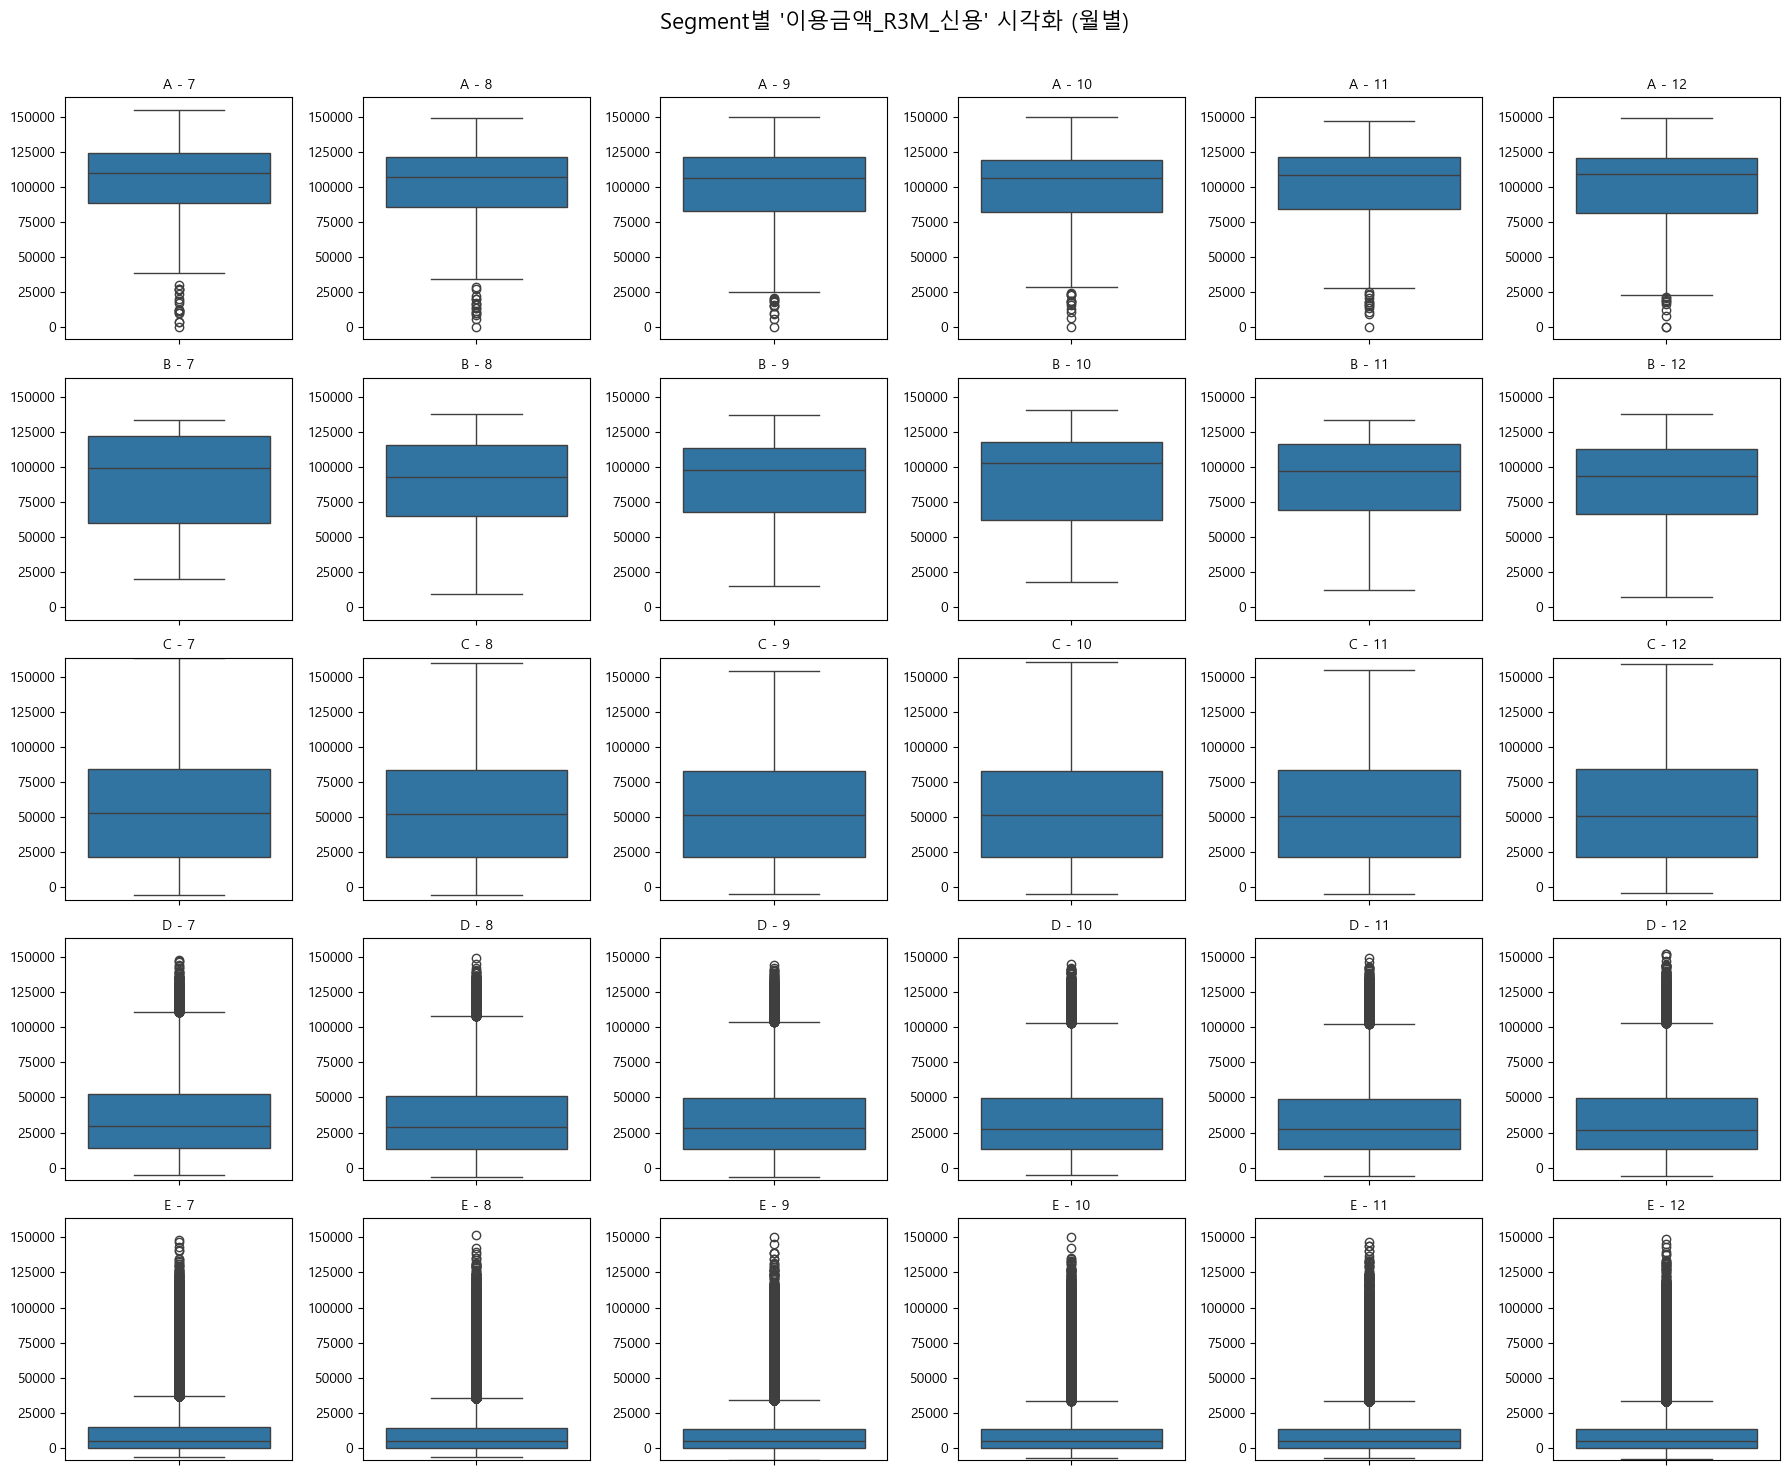

In [6]:
plot_segment_grid(dfs = customers,
                  col = "이용금액_R3M_신용",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3))

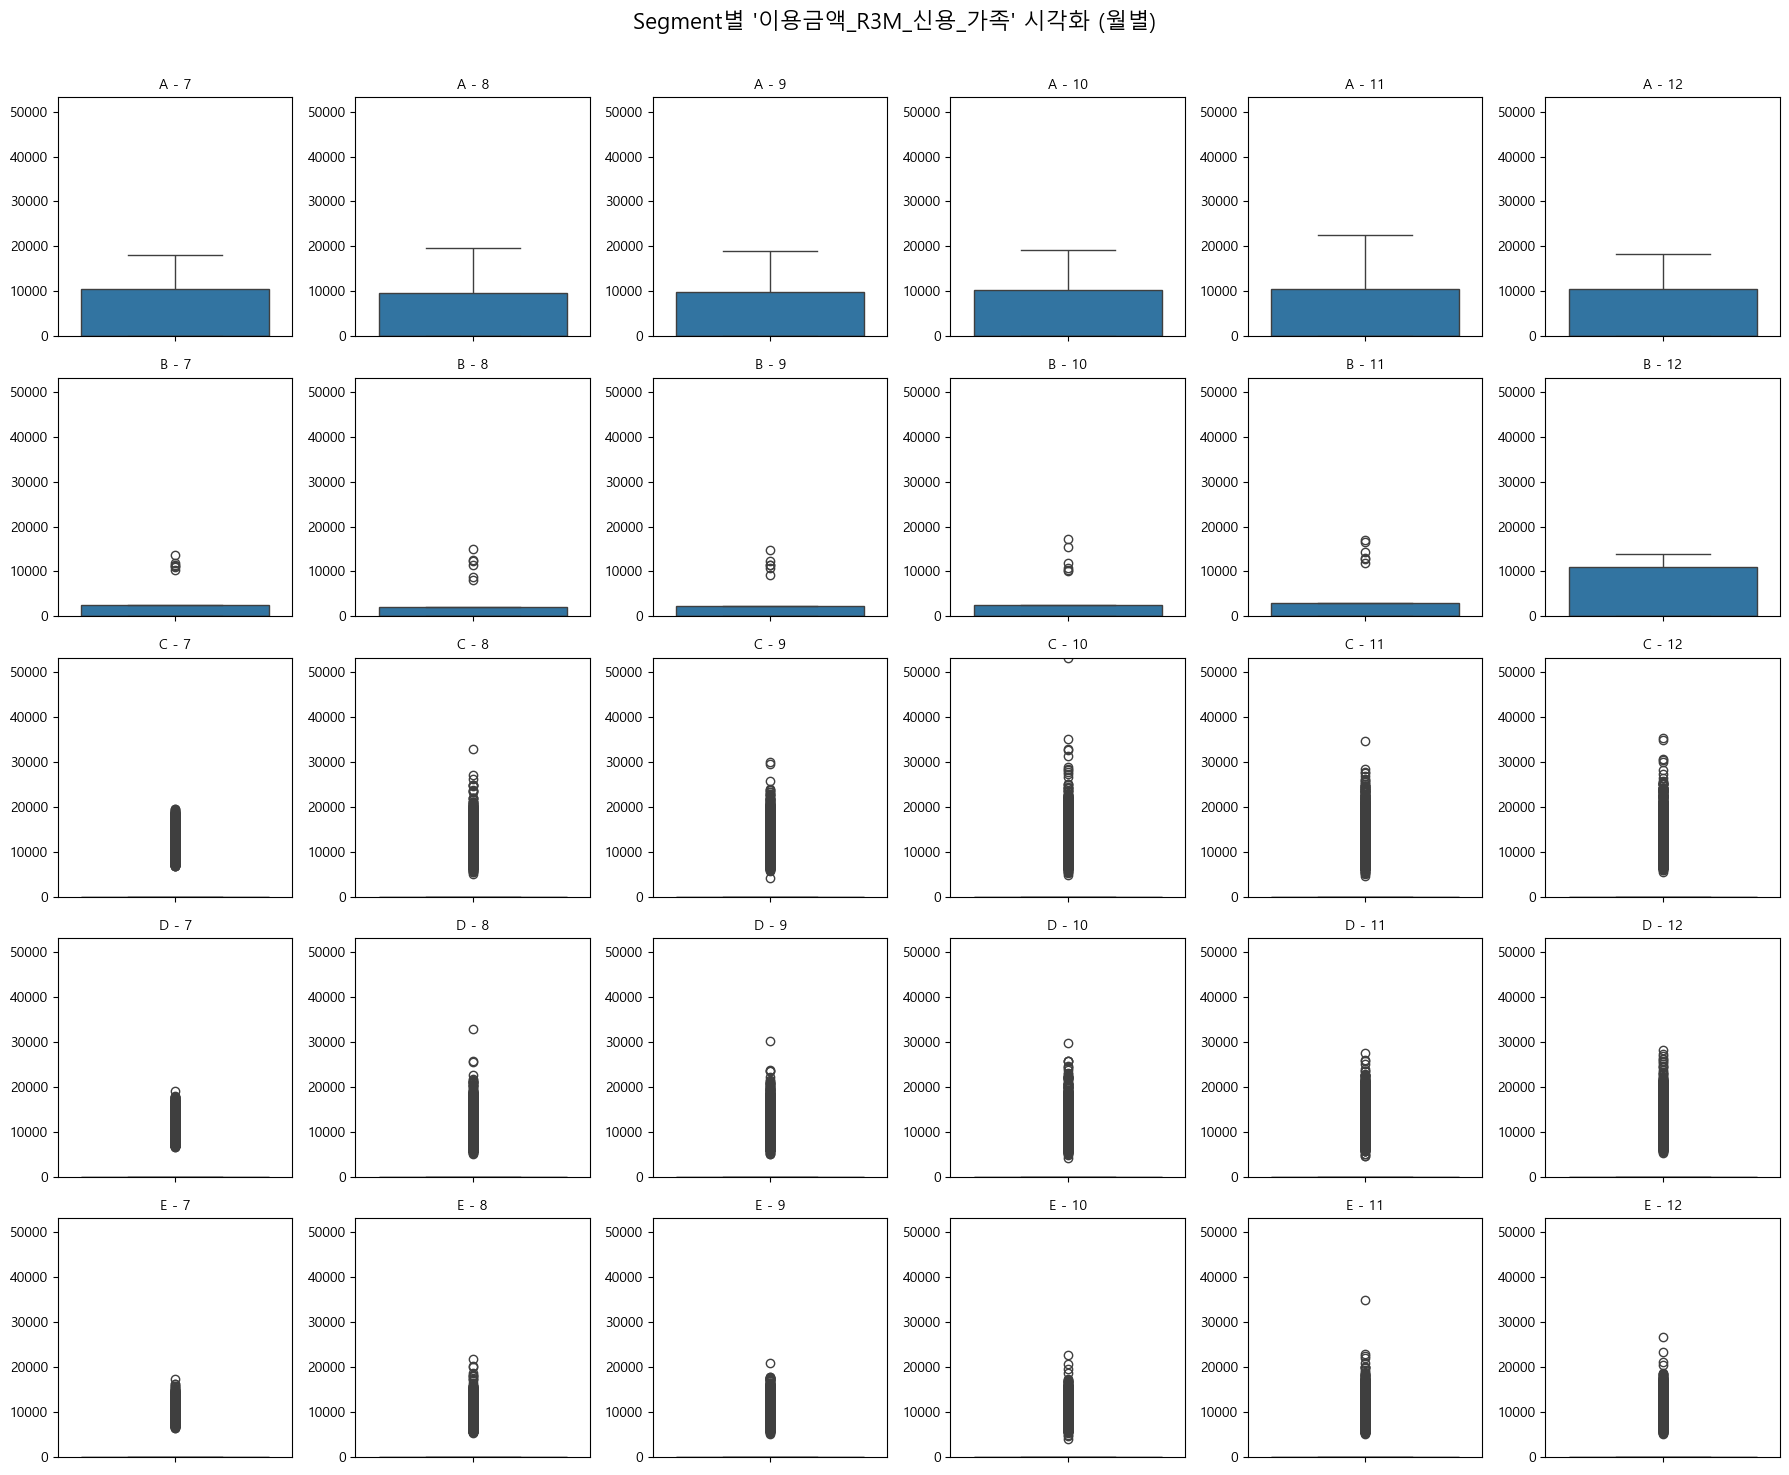

In [4]:
plot_segment_grid(dfs = customers,
                  col = "이용금액_R3M_신용_가족",
                  is_categorical= False,
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3))

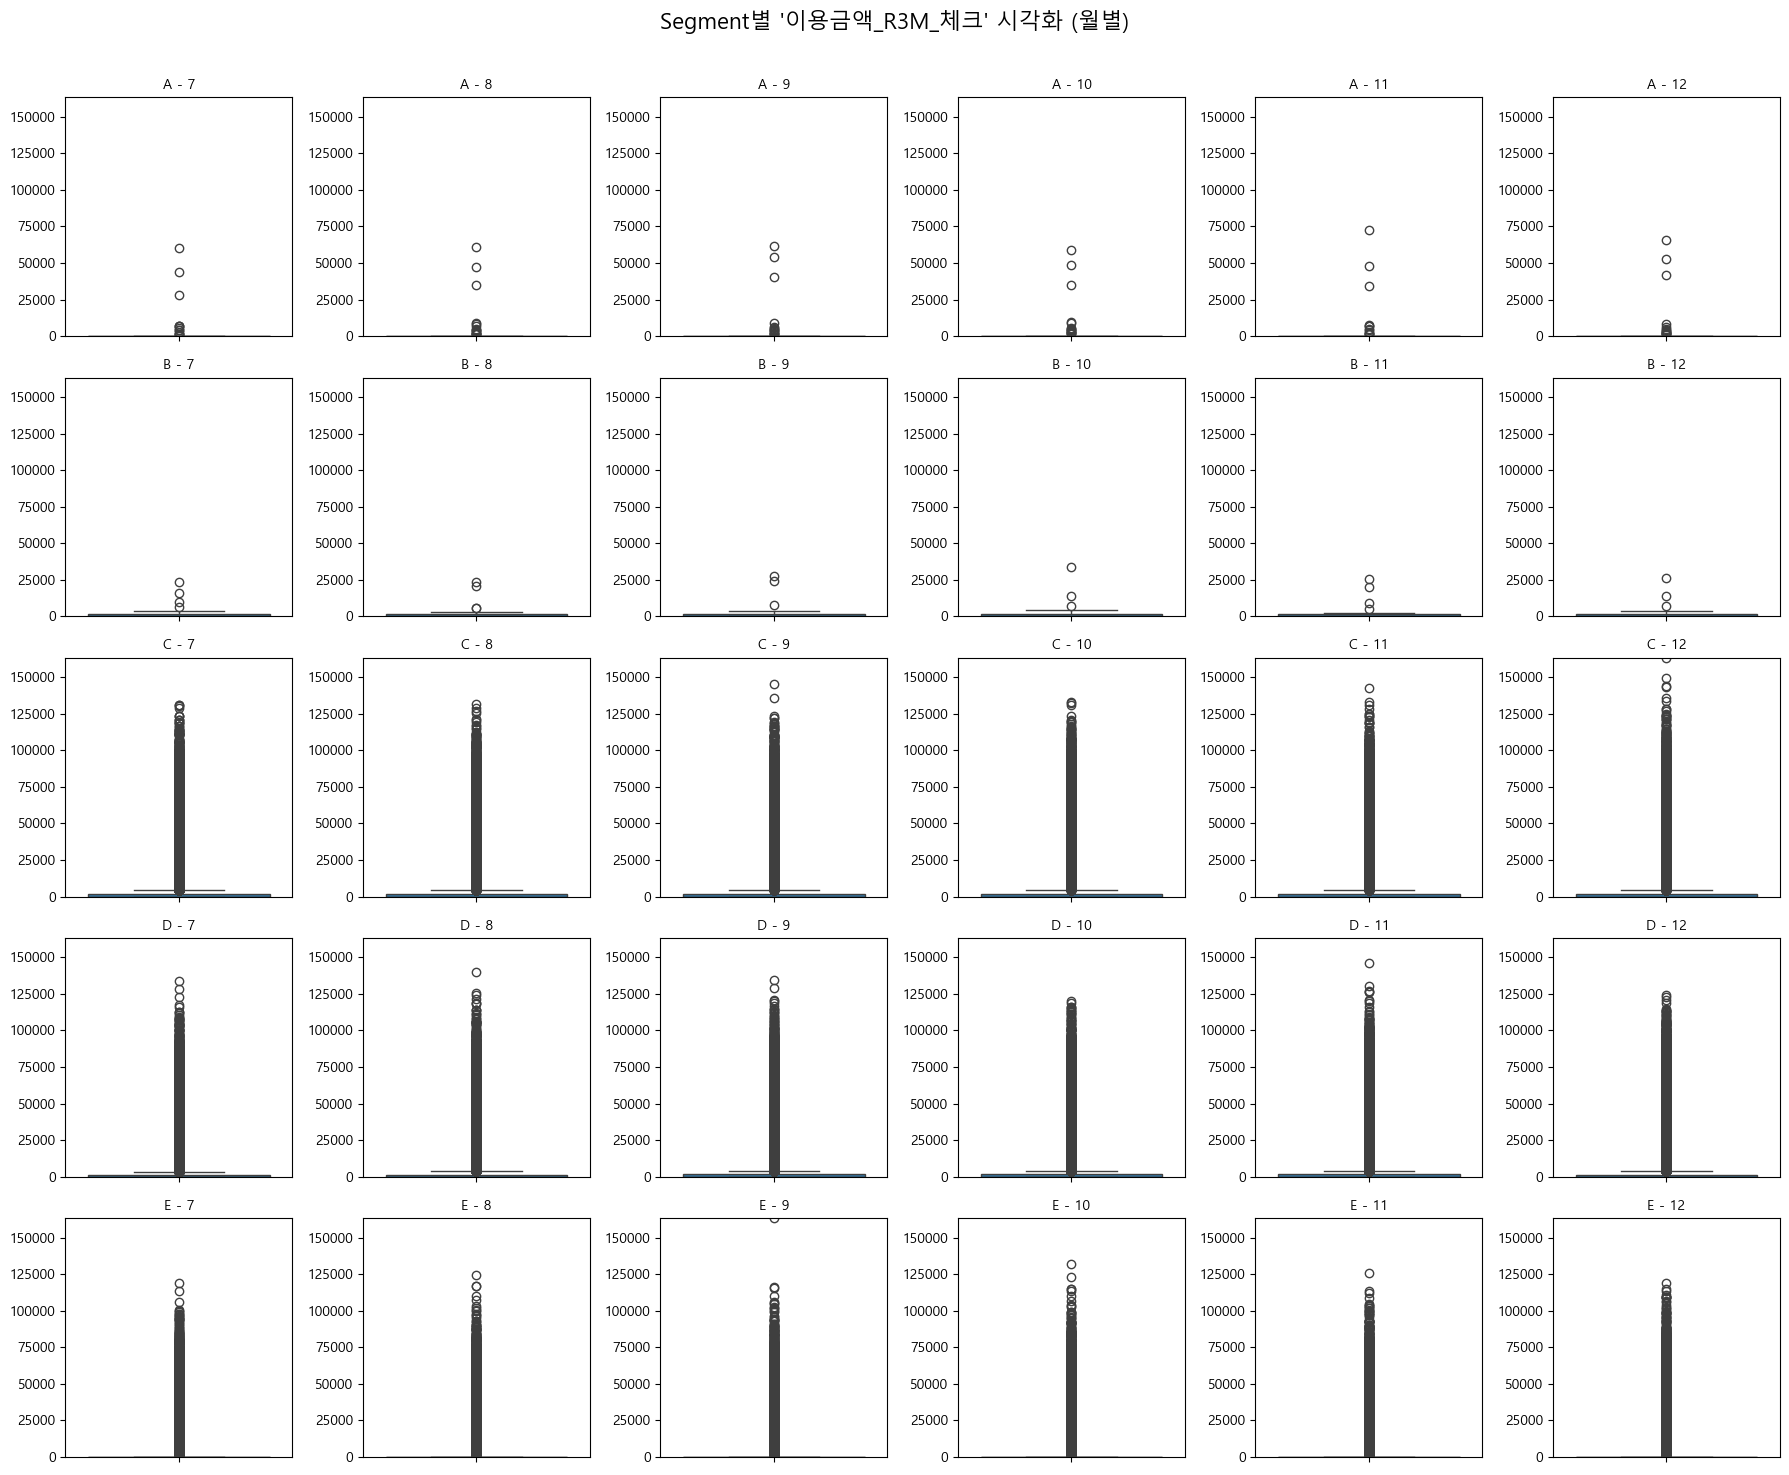

In [5]:
plot_segment_grid(dfs = customers,
                  col = "이용금액_R3M_체크",
                  is_categorical= False,
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3))

c:\Users\erich\Desktop\HYU\신용카드 고객 세그먼트 분류 공모전\eda\1.회원정보\..\plot.py:88: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(global_min, global_max)
c:\Users\erich\Desktop\HYU\신용카드 고객 세그먼트 분류 공모전\eda\1.회원정보\..\plot.py:88: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(global_min, global_max)
c:\Users\erich\Desktop\HYU\신용카드 고객 세그먼트 분류 공모전\eda\1.회원정보\..\plot.py:88: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(global_min, global_max)
c:\Users\erich\Desktop\HYU\신용카드 고객 세그먼트 분류 공모전\eda\1.회원정보\..\plot.py:88: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(global_min, global_max)
c:\Users\erich\Desktop\HYU\신용카드 고객 세그먼트 분류 공모전\eda\1.회원정보\..\plot.py:88: UserWarning: Attemp

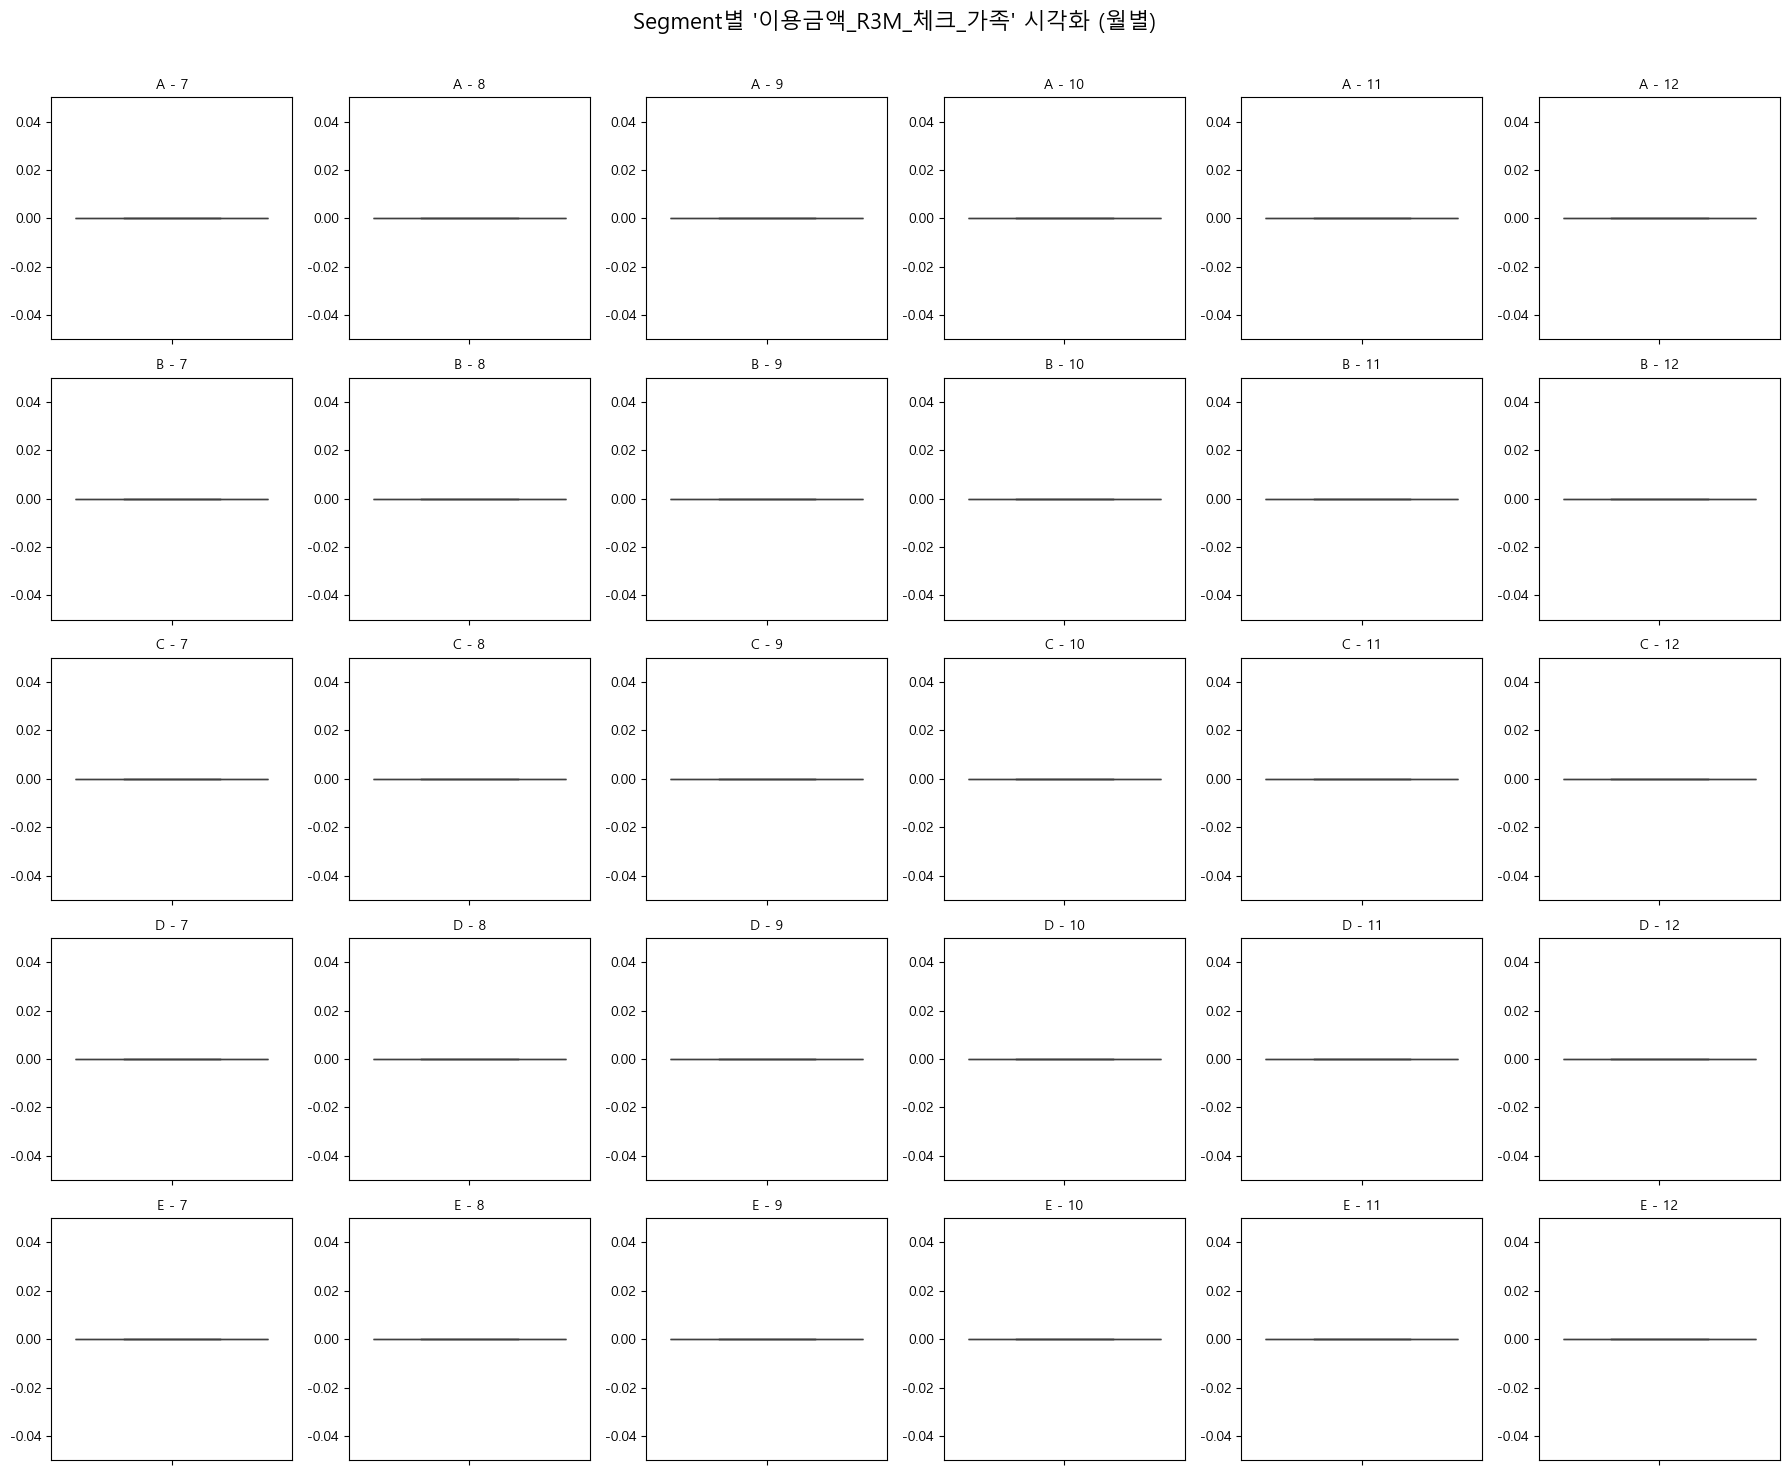

In [6]:
plot_segment_grid(dfs = customers,
                  col = "이용금액_R3M_체크_가족",
                  is_categorical= False,
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3))

## 연회비

'연회비발생카드수_B0M','연회비할인카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M', '할인금액_기본연회비_B0M', '할인금액_제휴연회비_B0M', '청구금액_기본연회비_B0M', '청구금액_제휴연회비_B0M'

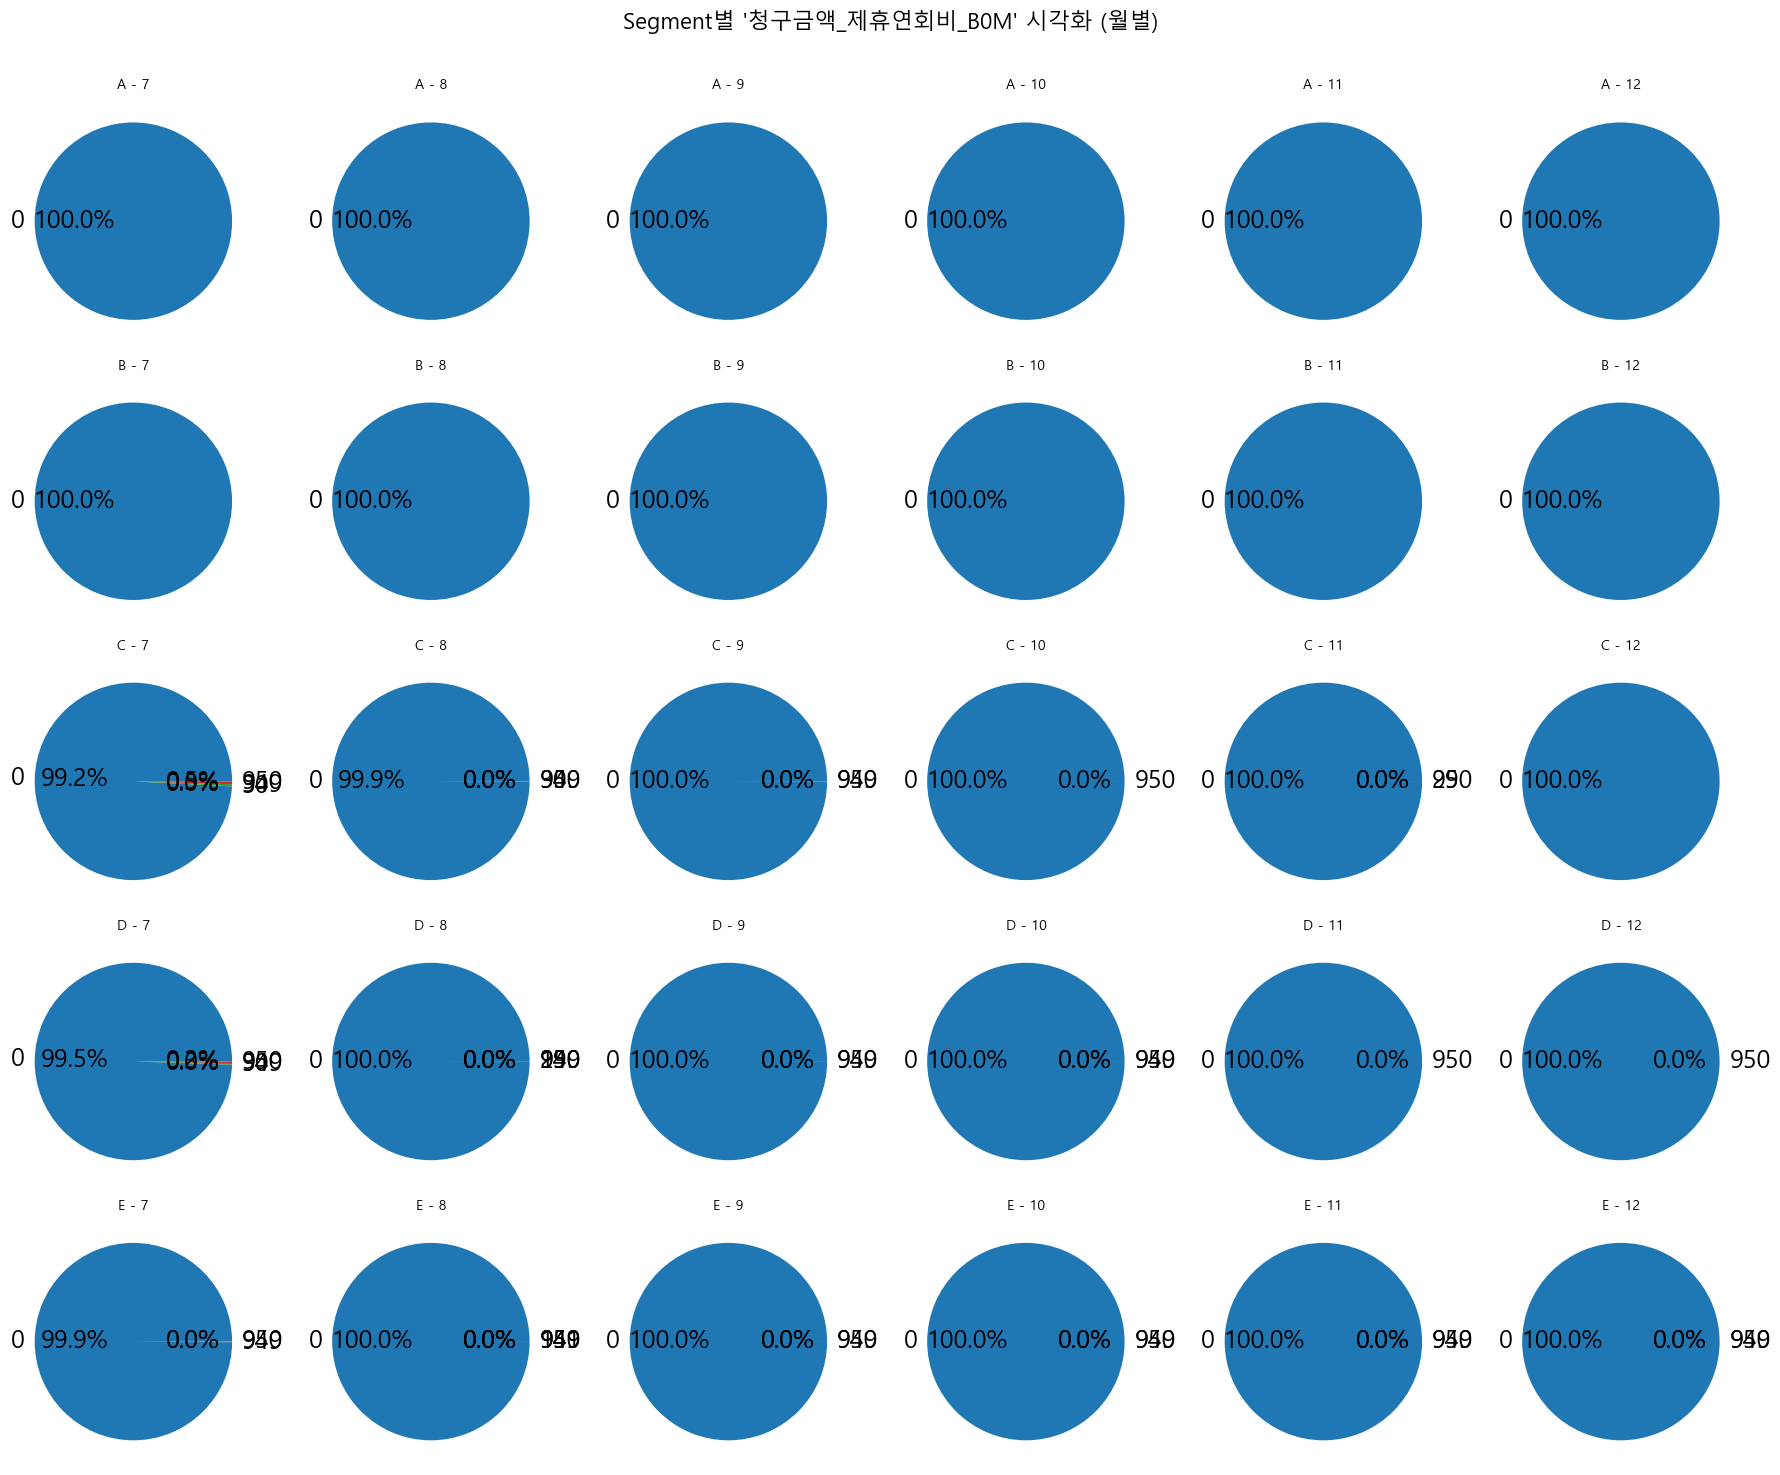

In [19]:
plot_segment_grid(dfs = customers,
                  col = "청구금액_제휴연회비_B0M",
                  months = [7, 8, 9, 10, 11, 12],
                  segment_col = "Segment",
                  subfigsize = (3, 3))

## {1,2,3}순위 카드 이용금액

'_1순위카드이용금액', '_1순위카드이용건수','_1순위신용체크구분', '_2순위카드이용금액', '_2순위카드이용건수', '_2순위신용체크구분',